<a href="https://colab.research.google.com/github/BhavyaGoyal777/computeTasks/blob/main/TASK3_MODEL_FITTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("data2.csv",skiprows=[8223])
new_df=pd.read_csv("data2.csv",skiprows=[8223])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32560, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1835
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1842
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.582217,1.897834e+05,10.080682,1077.681941,87.306511,40.438084
std,13.640253,1.055476e+05,2.572760,7385.403083,402.966116,12.347099
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isna().sum()

age                  0
workclass         1835
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1842
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<ipython-input-10-1b25a10f63e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
df["workclass"] = df["workclass"].fillna("Private")
df["native.country"] = df["native.country"].fillna("United-States")

<ipython-input-11-c69d22bad1fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["workclass"] = df["workclass"].fillna("Private")
<ipython-input-11-c69d22bad1fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["native.country"] = df["native.country"].fillna("United-States")


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [ ]:
numeric_features = ['age','education.num','capital.gain','capital.loss','hours.per.week','income']


In [ ]:
df= df.dropna(subset=['occupation'])


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [ ]:

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['income', 'workclass', 'education', 'relationship', 'occupation',  'race', 'sex', 'native.country']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)
df["marital.status"] =df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df["marital.status"] = df["marital.status"].map({"Married":1, "Single":0})
df["marital.status"] = df["marital.status"].astype(int)

In [ ]:
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,0,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,0,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,0,0,4,4,1,0,3770,40,38,0


In [ ]:
import statsmodels.api as sm
new_x=df[numeric_features]
new_y=df['income']
new_x=sm.add_constant(new_x)
ssm=sm.OLS(new_y,new_x)
fit=ssm.fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.075e+30
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:18:27   Log-Likelihood:             9.3280e+05
No. Observations:               30694   AIC:                        -1.866e+06
Df Residuals:                   30687   BIC:                        -1.866e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.032e-15   5.18e-16      7.

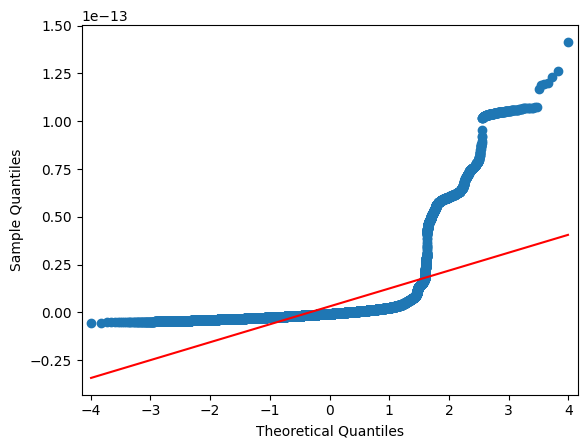

3.075768569900964e-15

In [ ]:

q=sm.qqplot(fit.resid,line='r')
plt.show()
np.mean(fit.resid)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['income']), df['income'], test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')


**** ACCURACY_SCORE **** 

 0.8577944290601075 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4699
           1       0.73      0.62      0.67      1440

    accuracy                           0.86      6139
   macro avg       0.81      0.78      0.79      6139
weighted avg       0.85      0.86      0.85      6139
 



In [36]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the hyperparameter grid with more combinations
param_grid = {
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to consider for each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [6,7],           # Maximum depth of a tree
    'n_estimators': [100, 200],       # Number of boosting rounds
    'subsample': [0.8, 0.9, 1.0],         # Fraction of samples to be used for each tree

}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Assuming you have already split your data into x_train, x_test, y_train, y_test
# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:\n", best_params)

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(x_test)

# Print evaluation metrics
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:25:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:
 {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
**** ACCURACY_SCORE **** 

 0.8794591953086822 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      4699
           1       0.79      0.66      0.72      1440

    accuracy                           0.88      6139
   macro avg       0.85      0.80      0.82      6139
weighted avg       0.88      0.88      0.88      6139
 



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the hyperparameter grid
param_grid = {
    'colsample_bytree': [0.6],
    'learning_rate': [0.1],
    'max_depth': [7],
    'n_estimators': [100],
    'subsample': [1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:\n", best_params)

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(x_test)

# Print evaluation metrics
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:
 {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
**** ACCURACY_SCORE **** 

 0.8794591953086822 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      4699
           1       0.79      0.66      0.72      1440

    accuracy                           0.88      6139
   macro avg       0.85      0.80      0.82      6139
weighted avg       0.88      0.88      0.88      6139
 



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

**** ACCURACY_SCORE **** 

 0.8705000814464896 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4699
           1       0.76      0.66      0.70      1440

    accuracy                           0.87      6139
   macro avg       0.83      0.80      0.81      6139
weighted avg       0.87      0.87      0.87      6139
 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
# Build the model
model = Sequential([

    Dense(25, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer=l2(0.01)),

    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.2)


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3487
Accuracy: 84.57%
**** CONFUSION MATRIX ****


<Axes: >

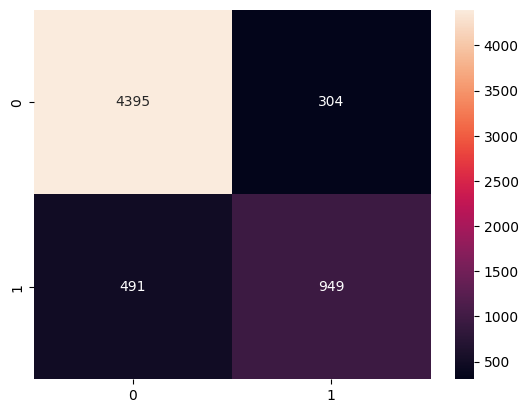

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 84.20%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4699
           1       0.71      0.55      0.62      1440

    accuracy                           0.84      6139
   macro avg       0.79      0.74      0.76      6139
weighted avg       0.83      0.84      0.83      6139

